# Asumptions of the Logistic Regression

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor

Examples Using the German Credit Dataset

In [52]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
columns = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'Savings', 'EmploymentSince',
    'InstallmentRate', 'PersonalStatusSex', 'OtherDebtors', 'ResidenceSince', 'Property', 'Age',
    'OtherInstallmentPlans', 'Housing', 'ExistingCredits', 'Job', 'NumPeopleLiable', 'Telephone',
    'ForeignWorker', 'Target'
]
df = pd.read_csv(url, sep=' ', header=None, names=columns)

# Encode the target variable: 1 for good credit, 0 for bad credit
df['Target'] = df['Target'].map({1: 1, 2: 0})

In [53]:
df.head()

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,ExistingCredits,Job,NumPeopleLiable,Telephone,ForeignWorker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [54]:
# Bin de l'âge pour visualiser la relation
df['AgeBin'] = pd.cut(df['Age'], bins=10)

In [55]:
age_grouped = df.groupby('AgeBin')['Target'].agg(['mean', 'count'])
age_grouped

/var/folders/tb/_m1wm0vd633_w2zg_9vw_19m0000gn/T/ipykernel_84116/4268239148.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('AgeBin')['Target'].agg(['mean', 'count'])


,mean,count
AgeBin,,
"(18.944, 24.6]",0.590604,149
"(24.6, 30.2]",0.667939,262
"(30.2, 35.8]",0.717514,177
"(35.8, 41.4]",0.780645,155
"(41.4, 47.0]",0.716981,106
"(47.0, 52.6]",0.836364,55
"(52.6, 58.2]",0.642857,42
"(58.2, 63.8]",0.692308,26
"(63.8, 69.4]",0.761905,21


In [56]:
age_grouped['log_odds'] = np.log(age_grouped['mean'] / (1 - age_grouped['mean']))

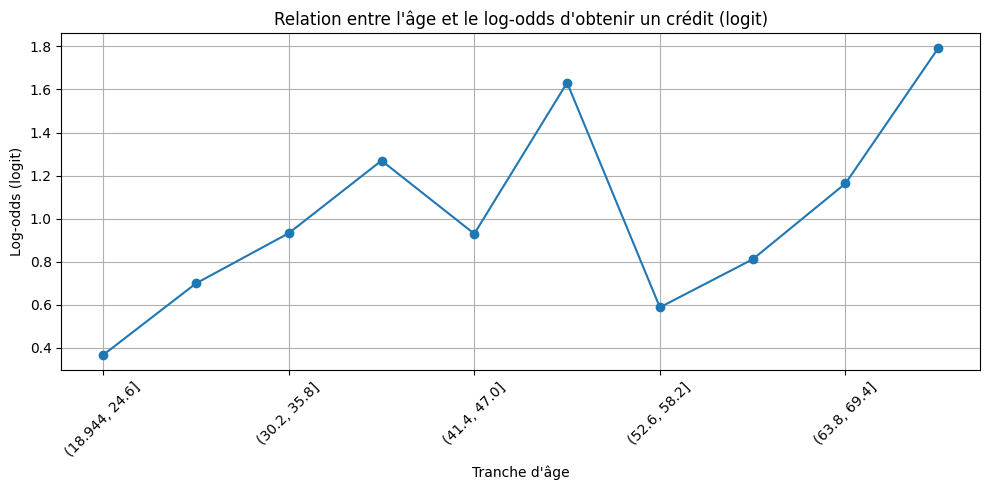

In [57]:
# Affichage de la relation entre âge et log-odds
plt.figure(figsize=(10, 5))
age_grouped['log_odds'].plot(marker='o')
plt.title("Relation entre l'âge et le log-odds d'obtenir un crédit (logit)")
plt.xlabel("Tranche d'âge")
plt.ylabel("Log-odds (logit)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 1. Linearity between Independent Variables and the Log-Odds

There should be a linear relationship between each continuous independent variable and the log-odds of the dependent variable

In [58]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor

def add_slide(prs, title, content_lines):
    slide_layout = prs.slide_layouts[1]  # Title and Content
    slide = prs.slides.add_slide(slide_layout)
    title_placeholder = slide.shapes.title
    content_placeholder = slide.placeholders[1]

    title_placeholder.text = title
    content_placeholder.text = ""
    for line in content_lines:
        p = content_placeholder.text_frame.add_paragraph()
        p.text = line
        p.level = 0
        p.font.size = Pt(18)

    return slide


In [59]:
# Create presentation
prs = Presentation()

# Slide 1: Title
slide_layout = prs.slide_layouts[0]
title_slide = prs.slides.add_slide(slide_layout)
title_slide.shapes.title.text = "Logistic Regression: Core Assumptions"
title_slide.placeholders[1].text = "Focus on the linearity of the log-odds and interpretability"

# Slide 2: Assumption Statement
add_slide(prs, "Key Assumption in Logistic Regression", [
    "The log-odds (logit) is a linear function of the predictors:",
    "log(P(Y=1)/P(Y=0)) = β0 + β1x1 + β2x2 + ... + βkxk",
    "This is a fundamental modeling assumption."
])

# Slide 3: Why Linearity Matters
add_slide(prs, "Why Linearity of the Logit Matters", [
    "It defines the functional form of the model.",
    "Allows for straightforward estimation via maximum likelihood.",
    "Enables interpretable coefficients.",
    "Supports generalization and predictive stability."
])

# Slide 4: Interpretability of Coefficients
add_slide(prs, "Interpreting Coefficients", [
    "Each β_j reflects the effect of x_j on the log-odds.",
    "An increase of 1 unit in x_j multiplies the odds by exp(β_j).",
    "This is a multiplicative effect on the odds, not on the probability.",
    "Why do we say coefficients act multiplicatively on the odds?",
    "Odds are defined as: odds = P(Y=1) / (1 - P(Y=1))",
    "Now suppose we increase x_j by one unit, keeping other x_i constant:",
    "log(odds) = β0 + β1x1 + ... + βjxj + ... + βkxk",
    "Then log(odds)_new = log(odds)_old + βj",
    "Exponentiating both sides gives:",
    "odds_new = odds_old * exp(βj)"
])

# Slide 5: Example of Odds Multiplication
add_slide(prs, "Odds Ratio Interpretation", [
    "If β_age = 0.05, then:",
    "Each additional year of age multiplies the odds of Y=1 by exp(0.05) ≈ 1.051.",
    "That is a 5.1% increase in the odds for a one-year increase in age."
])

# Slide 6: User's Question: Can we test linearity by checking P(Y=1|x)?
add_slide(prs, "User Question: Is Checking P(Y=1|x) Sufficient?", [
    "User strategy: Bin x and plot P(Y=1) per bin.",
    "Check if probability curve is monotonic.",
    "But: Monotonicity does not imply linearity of the logit.",
    "⚠️ The monotonicity of P(Y=1 | x) does not guarantee the linearity of the logit.",
    "The logistic function: P(Y=1 | x) = 1 / (1 + exp(-(β0 + β1x)))",
    "is always monotonic (increasing if β1 > 0, decreasing if β1 < 0).",
    "But monotonic P(Y=1 | x) does not imply that the log-odds is a linear function of x.",
    "In other words:",
    "✅ Linearity of the logit ⇒ monotonic P(Y=1 | x)",
    "❌ Monotonic P(Y=1 | x) ⇒ linearity of the logit"
])

# Slide 7: Why Monotonicity is Not Enough
add_slide(prs, "Why Monotonic P(Y=1|x) ≠ Linear Logit", [
    "The logistic curve is always monotonic.",
    "Monotonic probability does not ensure that logit(P(Y=1)) is linear in x.",
    "You could have a monotonic but nonlinear logit function."
])

# Slide 8: Better Approaches to Assess Linearity
add_slide(prs, "How to Test Linearity of the Logit", [
    "1. Plot log-odds by binned x: log(p / (1 - p))",
    "2. Include polynomial terms (e.g., x²) or splines.",
    "3. Use GAMs (Generalized Additive Models) to model logit = s(x)."
])

# Slide 9: Visualizing Nonlinearity with Splines
add_slide(prs, "Example: GAM with Splines on Age (German Credit)", [
    "A cubic spline is fit to model the log-odds of credit approval vs age.",
    "Splines help capture subtle nonlinear patterns not detected in linear models.",
    "This supports the idea that linearity might not hold globally.",
    "Model fitted using statsmodels + patsy (B-spline basis).",
    "Visual shows actual data and smooth logit prediction curve."
])

# Slide 10: Validating Spline Use
add_slide(prs, "Spline Use: Empirical and Statistical Justification", [
    "Splines in GAMs offer flexible modeling of nonlinear relationships.",
    "They can be evaluated using:",
    "- Likelihood ratio tests",
    "- AIC/BIC comparison",
    "- Cross-validation",
    "- p-values of spline basis terms",
    "These tools help determine if the added complexity is justified."
])

# Slide 11: Independence of Observations
add_slide(prs, "Independence of Observations", [
    "Assumption: Each observation should be independent of the others.",
    "For time-series or grouped data, check autocorrelation using ACF plots.",
    "For the German Credit dataset: Likely satisfied (no time structure).",
    "Code example: plot_acf(df['Duration'])"
])

# Slide 12: Multicollinearity Check", [
add_slide(prs, "Multicollinearity Check", [
    "Assumption: Predictors should not be highly correlated.",
    "Check using Variance Inflation Factor (VIF).",
    "Rule of thumb: VIF > 5 or 10 → strong multicollinearity.",
    "Code snippet:",
    "from statsmodels.stats.outliers_influence import variance_inflation_factor",
    "[variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]"
])

# Slide 13: Sample Size Sufficiency
add_slide(prs, "Sample Size Sufficiency", [
    "Rule of thumb: ≥10 events per predictor variable.",
    "Helps avoid overfitting and ensures model stability.",
    "Example: If 100 positive cases and 10 predictors → safe to proceed.",
    "Code: df['target'].value_counts()  # Count events/non-events"
])

# Slide 14: Outlier Detection
add_slide(prs, "Outlier Detection with Cook's Distance", [
    "Outliers can exert disproportionate influence on the model.",
    "Cook's distance helps detect influential observations.",
    "High Cook's D suggests review/removal.",
    "Code: influence = model.get_influence(); cooks = influence.cooks_distance[0]"
])

# Slide 15: Binary Target Variable
add_slide(prs, "Check Binary Target", [
    "Logistic regression requires a binary dependent variable.",
    "Only two values (0 and 1) should exist in the target column.",
    "Code example: df['target'].value_counts()",
    "If more than two classes → consider one-vs-rest or multinomial models."
])

# Save the presentation
prs.save("logistic_regression_assumptions.pptx")


In [60]:
# Save the presentation
prs.save("logistic_regression_assumptions.pptx")

/Users/davidtbo/Documents/Data_Science/10_Generalized_Linear_Model/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/davidtbo/Documents/Data_Science/10_Generalized_Linear_Model/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


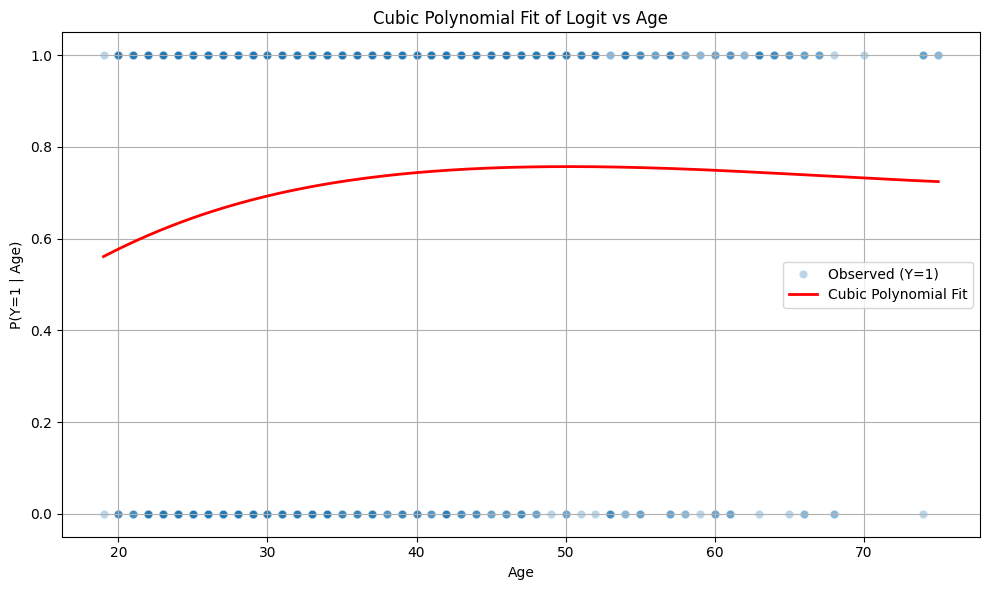

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Load German Credit dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
columns = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'Savings', 'EmploymentSince',
    'InstallmentRate', 'PersonalStatusSex', 'OtherDebtors', 'ResidenceSince', 'Property', 'Age',
    'OtherInstallmentPlans', 'Housing', 'ExistingCredits', 'Job', 'NumPeopleLiable', 'Telephone',
    'ForeignWorker', 'Target'
]
df = pd.read_csv(url, sep=' ', header=None, names=columns)
df['Target'] = df['Target'].map({1: 1, 2: 0})  # 1 = Good, 0 = Bad credit

# Prepare predictor and target
X = df[['Age']]
y = df['Target']

# Fit a cubic logistic regression model using polynomial features
model = make_pipeline(PolynomialFeatures(degree=3), LogisticRegression())
model.fit(X, y)

# Generate predictions over a smooth range of ages
age_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
predicted_probs = model.predict_proba(age_range)[:, 1]

# Plot the observed data and the fitted curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Target', data=df, alpha=0.3, label='Observed (Y=1)')
plt.plot(age_range, predicted_probs, color='red', linewidth=2, label='Cubic Polynomial Fit')
plt.title("Cubic Polynomial Fit of Logit vs Age")
plt.xlabel("Age")
plt.ylabel("P(Y=1 | Age)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
